In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
np.random.seed(42)

In [3]:
df = pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA503\risk\Analysis_Data.csv')

In [4]:
df.head()

,Date,Cost_per_Crude_Well_Drilled,Cost_per_Natural_Gass_Well_Drilled,Cost_pe_ Dry_Well_Drilled,return_Crude_Oil,Return_Natural_Gas,Return_Dry_Well
0,1960,52.2,102.7,44.0,.,.,.
1,1961,51.3,94.7,45.2,-1.72%,-7.79%,2.73%
2,1962,54.2,97.1,50.8,5.65%,2.53%,12.39%
3,1963,51.8,92.4,48.2,-4.43%,-4.84%,-5.12%
4,1964,50.6,104.8,48.5,-2.32%,13.42%,0.62%


In [5]:
df = df[(df['Date'] > 1990) & (df['Date'] < 2007)]

In [10]:
df.to_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA503\risk\pivot.csv')

In [17]:
#reread
df=pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA503\risk\pivot.csv')

In [18]:
df.head()

,Date,Type,Cost_per_Drilled,Return
0,1991,Oil,346.9,0.0780
1,1992,Oil,362.3,0.0444
2,1993,Oil,356.6,-0.0157
3,1994,Oil,409.5,0.1483
4,1995,Oil,415.8,0.0154


# Normal

## From 2006 to 2012 changes were relatively consistent in their distribution. This distribution is discussed as Normal

In [21]:
#get mean and sd of return rate
np.std(df['Return']), np.mean(df['Return'])

(0.1765663539402397, 0.1314875)

In [22]:
#cost mean
np.mean(df['Cost_per_Drilled'])

963.8020833333336

In [25]:
[i for i in range(2006,2012)]

[2006, 2007, 2008, 2009, 2010, 2011]

In [150]:
mu, sigma, cost_t0 = 0.1314875, 0.1765663539402397,963.8020833333336 # mean and standard deviation
# dx = np.random.normal(mu, sigma, 10000)
# cost_t = cost_t0*(1+dx)

#2006-2012
def normal_d(mu, sigma, cost_t0):
    for i in range(10001):
        dx = np.random.normal(mu, sigma, 10000)
        Pt = cost_t0*(1 + dx)

        for j in range(2006, 2012):
            dx = np.random.normal(mu, sigma, 10000)
            Pt = Pt*(1 + dx)
        return Pt
cost_2006_2012=normal_d(mu, sigma, cost_t0)



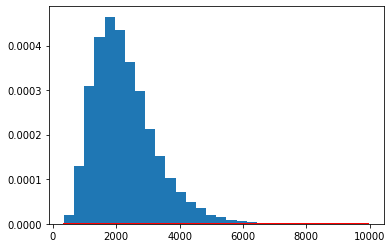

In [151]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(cost_2006_2012, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [152]:
cost_2006_2012.mean()

2277.375826096495

In [146]:
## qq plot

In [155]:
cost_2006_2012


array([1379.97057481, 4708.0550317 , 2327.03248071, ..., 1769.9372633 ,
       1154.10446893, 1810.68748003])

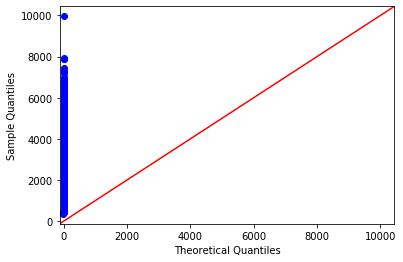

In [161]:
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
 

sm.qqplot(cost_2006_2012, line ='45') 
py.show() 

### triangular

In [130]:
#2012-2015 average by 9.17% per year with a maximum of 22% and minimum of 7%.¶
t_min1, t_mean1, t_max1=0.07, 0.0917, 0.22
cost_t1=cost_2006_2012.mean()
def triangular(t_min1, t_mean1, t_max1):
    for i in range(10001):
        dx = np.random.triangular(t_min1, t_mean1,t_max1, size=10000) 
        Pt = cost_t1*(1 + dx)
        for j in range(2012, 2015):
            dx = np.random.triangular(left = t_min1, mode = t_mean1, right = t_max1, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2012_2015=triangular(t_min1, t_mean1, t_max1)

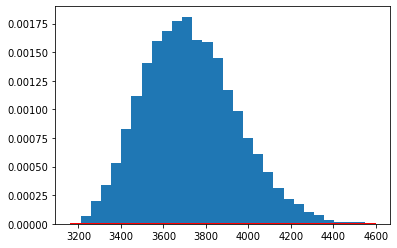

In [133]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(cost_2012_2015, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [134]:
#From 2015 to 2019 costs tended to increase on average by 5% per year with a maximum of 6% and minimum of 2%.
t_min2, t_mean2, t_max2=0.02, 0.05, 0.06
cost_t2=cost_2012_2015.mean()
def triangular(t_min2, t_mean2, t_max2):
    for i in range(10001):
        dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
        Pt = cost_t2*(1 + dx)
        for j in range(2012, 2015):
            dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2015_2019=triangular(t_min2, t_mean2, t_max2)

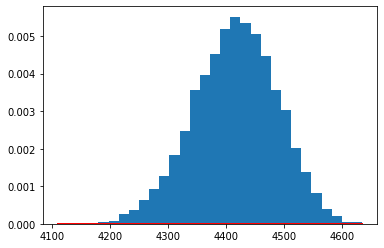

In [135]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(cost_2015_2019, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [136]:
#2020 is forecasted to follow the same increase distribution as from 2015 to 2019.
t_min3, t_mean3, t_max3=0.02, 0.05, 0.06
cost_t3=cost_2015_2019.mean()
def triangular(t_min3, t_mean3, t_max3):
    for i in range(10001):
        dx = np.random.triangular(t_min3, t_mean3, t_max3, size=10000) 
        Pt = cost_t3*(1 + dx)
    return Pt
cost_2020=triangular(t_min3, t_mean3, t_max3)

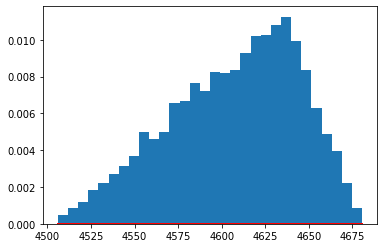

In [137]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(cost_2020, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# Kernel

## The Price Analysis group would also like you to build a kernel density estimate of the distribution of arithmetic changes using the 48 observations described above (1990 – 2006). Use this kernel density to simulate the changes from 2006 to 2012 as well.

In [50]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [54]:
len(df['Return'])

48

In [67]:
#kernel for 1990-2006


#search for bandwidth

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(-.5, .5, 100)},
                    cv=20) # 20-fold cross-validation
grid.fit(df['Return'][:, None])
print (grid.best_params_)

{'bandwidth': 0.09595959595959602}


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
def kde_sklearn(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [68]:
x, x_grid,bandwidth =df['Return'], np.linspace(-.5, .5, 100),  0.09
kernel_1990_2006=kde_sklearn(x, x_grid, bandwidth)

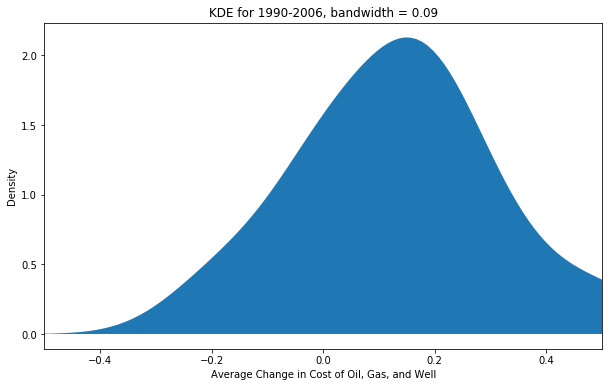

In [69]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.fill_between(x_grid, kernel_1990_2006); # fill the space between the x dimension and the density curve
ax.set_xlim(-.5, .5);
ax.set(title = 'KDE for 1990-2006, bandwidth = {}'.format(bandwidth),
       ylabel = 'Density',
       xlabel = 'Average Change in Cost of Oil, Gas, and Well');

### simulate the changes from 2006 to 2012

In [95]:
def kde_sample(x, x_grid, n, bandwidth):
    """return random sample from KDE"""
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    sample = kde_skl.sample(n_samples = n, random_state = 42)
    return(sample)

In [117]:
df['Return'].describe()

count    48.000000
mean      0.131488
std       0.178435
min      -0.242100
25%       0.007625
50%       0.135250
75%       0.224575
max       0.551900
Name: Return, dtype: float64

In [115]:
x, x_grid,bandwidth =df['Return'], np.linspace(-.5, .5, 100),  0.09

kde_sample(x, x_grid, 1000, bandwidth)

array([[-1.42906910e-01],
       [-1.62680992e-01],
       [ 3.01917807e-01],
       [ 1.69952717e-01],
       [ 3.20581140e-01],
       [ 3.67470265e-01],
       [ 5.93529939e-02],
       [ 5.42620713e-03],
       [ 1.08685086e-01],
       [-3.38986484e-01],
       [ 1.16665640e-01],
       [ 2.28891892e-01],
       [ 5.08842095e-01],
       [ 1.13792628e-01],
       [ 2.86104911e-01],
       [ 4.78183757e-01],
       [ 3.28340036e-01],
       [ 9.33506276e-03],
       [ 1.79348654e-01],
       [ 3.92678053e-01],
       [ 6.36345543e-01],
       [ 2.60255974e-01],
       [ 3.40550870e-01],
       [-2.00504776e-01],
       [-6.09046605e-02],
       [ 9.64745089e-02],
       [-2.22107961e-01],
       [-6.41873759e-02],
       [ 2.28018051e-01],
       [-9.62146572e-02],
       [ 5.35081552e-01],
       [ 3.43824205e-01],
       [ 2.78528010e-01],
       [-2.48100701e-02],
       [ 3.03066009e-01],
       [ 7.80995664e-02],
       [ 3.55934524e-01],
       [ 9.54667716e-02],
       [ 2.0

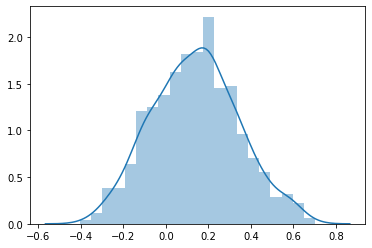

In [116]:
sns.distplot(kde_sample(x, x_grid, 1000, bandwidth))

In [138]:
cost_t0=963.8020833333336 
x, x_grid,bandwidth =df['Return'], np.linspace(-.5, .5, 100),  0.09

def simulate_kde(cost_t0, x,x_grid,
                bandwidth):
        # for kde sampling     
        for i in range(10000):
    
            dx = kde_sample(x, x_grid, n = 10000, bandwidth=bandwidth)
            cost_t = cost_t0*(1+dx)
     
            for j in range(2006, 2012):
                dx = kde_sample(x, x_grid, n = 10000, bandwidth=bandwidth)
                cost_t =  cost_t*(1+dx)
            return cost_t

In [139]:
kernel_2006_2012=simulate_kde(cost_t0, x,x_grid,bandwidth)

In [103]:
len(kernel_2006_2012)

10000

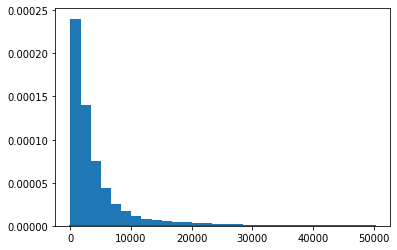

In [140]:
count, bins, ignored = plt.hist(kernel_2006_2012, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## keep going with the two triangular ones

In [141]:
#From 2015 to 2019 costs tended to increase on average by 5% per year with a maximum of 6% and minimum of 2%.
t_min2, t_mean2, t_max2=0.02, 0.05, 0.06
cost_t2=kernel_2006_2012.mean()
def triangular(t_min2, t_mean2, t_max2):
    for i in range(10001):
        dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
        Pt = cost_t2*(1 + dx)
        for j in range(2012, 2015):
            dx = np.random.triangular(t_min2, t_mean2, t_max2, size=10000) 
            Pt = Pt*(1 + dx)
        return Pt
cost_2015_2019=triangular(t_min2, t_mean2, t_max2)

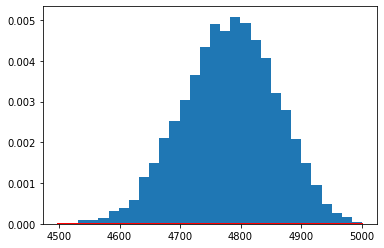

In [142]:

count, bins, ignored = plt.hist(cost_2015_2019, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [143]:
#2020 is forecasted to follow the same increase distribution as from 2015 to 2019.
t_min3, t_mean3, t_max3=0.02, 0.05, 0.06
cost_t3=cost_2015_2019.mean()
def triangular(t_min3, t_mean3, t_max3):
    for i in range(10001):
        dx = np.random.triangular(t_min3, t_mean3, t_max3, size=10000) 
        Pt = cost_t3*(1 + dx)
    return Pt
cost_2020=triangular(t_min3, t_mean3, t_max3)

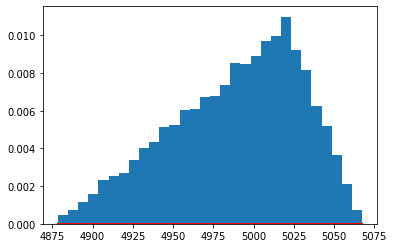

In [144]:

count, bins, ignored = plt.hist(cost_2020, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Simulate possible future values of 2020 drilling costs under both the assumption of Normality as well as under the kernel density estimate you created (2006 – 2012) as well as the information from 2015 – 2020. Make a recommendation for which one you feel the company should use (HINT: You will run two simulations).

In [105]:
#find mu and sigma of return rate
mu, sigma=np.mean(df['Return']), np.std(df['Return'])
def normal_return(mu, sigma):
    for i in range(10001):
        dx = np.random.normal(mu, sigma, 10000)

        for j in range(2006, 2019):
            dx = np.random.normal(mu, sigma, 10000)
        return dx
return_2006_2019=normal_return(mu, sigma)


In [106]:
## 2019 normal

mu, sigma, cost_t0 = np.mean(return_2006_2019), np.std(return_2006_2019), cost_2015_2019.mean()
mu, sigma, cost_t0 

(0.13084173776714356, 0.17639051444694714, 1287.243262016795)

In [107]:
#2020
def normal_d(mu, sigma, cost_t0):
    for i in range(10001):
        dx = np.random.normal(mu, sigma, 10000)
        Pt = cost_t0*(1 + dx)
        return Pt
cost_2020=normal_d(mu, sigma, cost_t0)

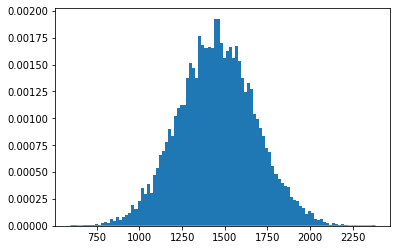

In [113]:
count, bins, ignored = plt.hist(cost_2020, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         )
plt.show()

In [126]:
## Kernel
